In [1]:
import yfinance as yf
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,GRU, LSTM

In [2]:
company = 'TSLA'
ticker = yf.Ticker(company)
df = ticker.history(start = '2012-1-1', end='2024-10-1')

df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-01-03 00:00:00-05:00,1.929333,1.966667,1.843333,1.872000,13921500,0.0,0.0
2012-01-04 00:00:00-05:00,1.880667,1.911333,1.833333,1.847333,9451500,0.0,0.0
2012-01-05 00:00:00-05:00,1.850667,1.862000,1.790000,1.808000,15082500,0.0,0.0
2012-01-06 00:00:00-05:00,1.813333,1.852667,1.760667,1.794000,14794500,0.0,0.0
2012-01-09 00:00:00-05:00,1.800000,1.832667,1.741333,1.816667,13455000,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-24 00:00:00-04:00,254.080002,257.190002,249.050003,254.270004,88491000,0.0,0.0
2024-09-25 00:00:00-04:00,252.539993,257.049988,252.279999,257.019989,65034300,0.0,0.0
2024-09-26 00:00:00-04:00,260.600006,261.750000,251.529999,254.220001,67142200,0.0,0.0


In [3]:
import warnings

warnings.filterwarnings("ignore")

data = pd.DataFrame()

end = 0
ciclo = 0
name = ''

for i in range(0, len(df)):
    end = i + 60
    ciclo = ciclo + 1
    name = 'C_' + str(ciclo).strip()
    if len(df.iloc[i:end, 1]) == 60:
        data[name] = df.iloc[i:end, 1].values
        
data.head()

,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,C_10,...,C_3138,C_3139,C_3140,C_3141,C_3142,C_3143,C_3144,C_3145,C_3146,C_3147
0,1.966667,1.911333,1.862000,1.852667,1.832667,1.850667,1.892000,1.908000,1.900000,1.822667,...,188.800003,187.970001,197.759995,198.720001,203.199997,213.229996,231.300003,248.350006,252.369995,259.440002
1,1.911333,1.862000,1.852667,1.832667,1.850667,1.892000,1.908000,1.900000,1.822667,1.792000,...,187.970001,197.759995,198.720001,203.199997,213.229996,231.300003,248.350006,252.369995,259.440002,265.609985
2,1.862000,1.852667,1.832667,1.850667,1.892000,1.908000,1.900000,1.822667,1.792000,1.849333,...,197.759995,198.720001,203.199997,213.229996,231.300003,248.350006,252.369995,259.440002,265.609985,267.589996
3,1.852667,1.832667,1.850667,1.892000,1.908000,1.900000,1.822667,1.792000,1.849333,1.800000,...,198.720001,203.199997,213.229996,231.300003,248.350006,252.369995,259.440002,265.609985,267.589996,271.000000
4,1.832667,1.850667,1.892000,1.908000,1.900000,1.822667,1.792000,1.849333,1.800000,1.814000,...,203.199997,213.229996,231.300003,248.350006,252.369995,259.440002,265.609985,267.589996,271.000000,251.839996


In [4]:
data2 = pd.DataFrame()
data2 = data.transpose()
data2.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
C_1,1.966667,1.911333,1.862000,1.852667,1.832667,1.850667,1.892000,1.908000,1.900000,1.822667,...,2.365333,2.392667,2.354667,2.346667,2.353333,2.343333,2.308667,2.539333,2.663333,2.562667
C_2,1.911333,1.862000,1.852667,1.832667,1.850667,1.892000,1.908000,1.900000,1.822667,1.792000,...,2.392667,2.354667,2.346667,2.353333,2.343333,2.308667,2.539333,2.663333,2.562667,2.546000
C_3,1.862000,1.852667,1.832667,1.850667,1.892000,1.908000,1.900000,1.822667,1.792000,1.849333,...,2.354667,2.346667,2.353333,2.343333,2.308667,2.539333,2.663333,2.562667,2.546000,2.529333
C_4,1.852667,1.832667,1.850667,1.892000,1.908000,1.900000,1.822667,1.792000,1.849333,1.800000,...,2.346667,2.353333,2.343333,2.308667,2.539333,2.663333,2.562667,2.546000,2.529333,2.531333
C_5,1.832667,1.850667,1.892000,1.908000,1.900000,1.822667,1.792000,1.849333,1.800000,1.814000,...,2.353333,2.343333,2.308667,2.539333,2.663333,2.562667,2.546000,2.529333,2.531333,2.564667


In [5]:
X = data2.iloc[:,0:59].to_numpy()
y = data2.iloc[:,-1].to_numpy()

print(X.shape)
print(y.shape)

(3147, 59)
(3147,)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [7]:
model_lr = LinearRegression()

model_lr.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred_lr = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)

print("Error cuadrático medio: ", mse_lr)

Error cuadrático medio:  18.43095521702836


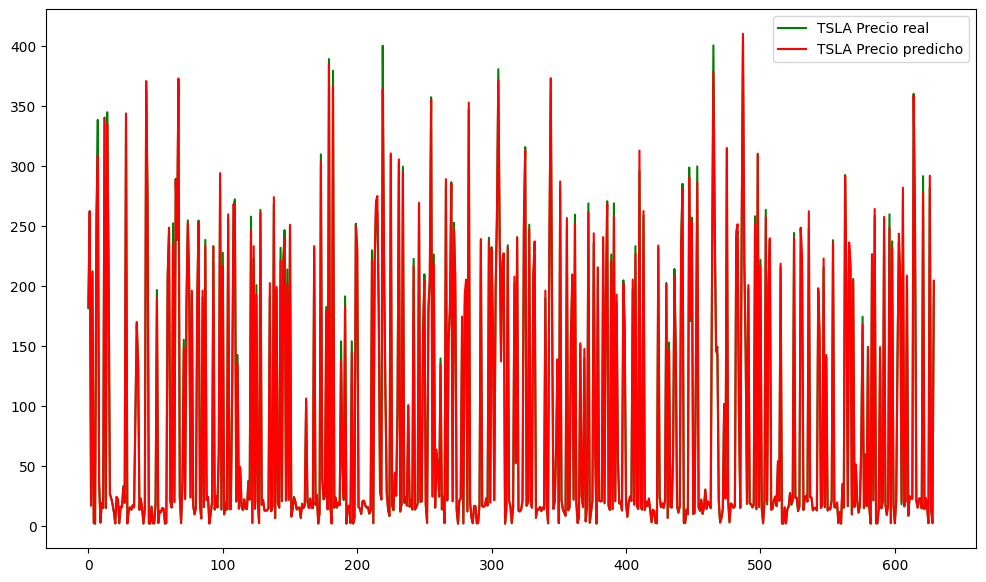

In [9]:
plt.figure(figsize=(12, 7))
plt.plot(y_test,color="green",label=f"{company} Precio real")
plt.plot(y_pred_lr,color="red",label=f"{company} Precio predicho")
plt.legend()
plt.show()

In [10]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()

model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [11]:
y_pred_rf = model_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)

print("Error cuadrático medio: ", mse_rf)

Error cuadrático medio:  23.501200594480068


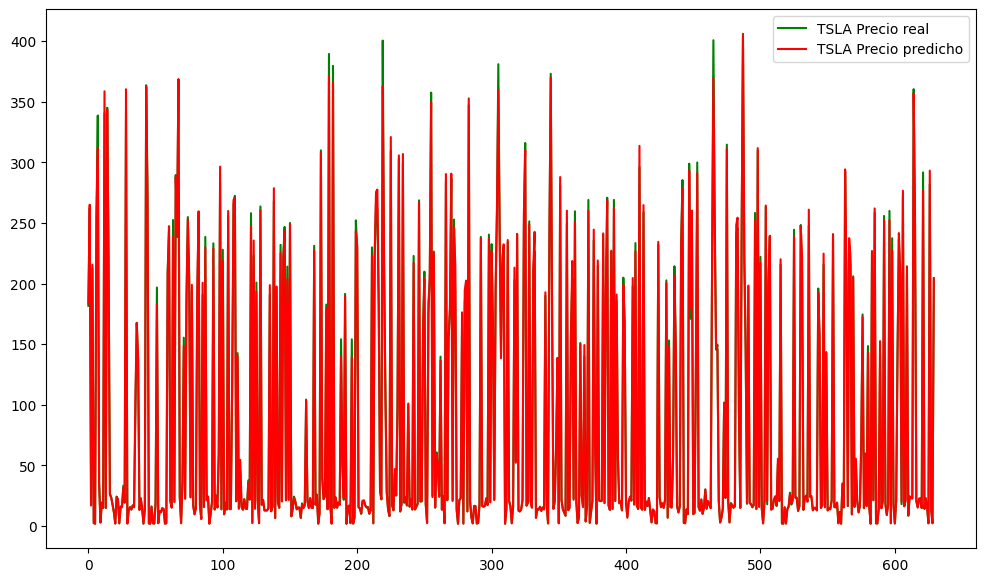

In [12]:
plt.figure(figsize=(12, 7))
plt.plot(y_test,color="green",label=f"{company} Precio real")
plt.plot(y_pred_rf,color="red",label=f"{company} Precio predicho")
plt.legend()
plt.show()

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

# Crear y entrenar el modelo de Gradient Boosting
modelo_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

modelo_gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [14]:
# Realizar predicciones
y_pred_gb = modelo_gb.predict(X_test)

# Calcular MSE y MAE
mse_gb = mean_squared_error(y_test, y_pred_gb)

print("Error cuadrático medio: ", mse_gb)

Error cuadrático medio:  23.76975495843208


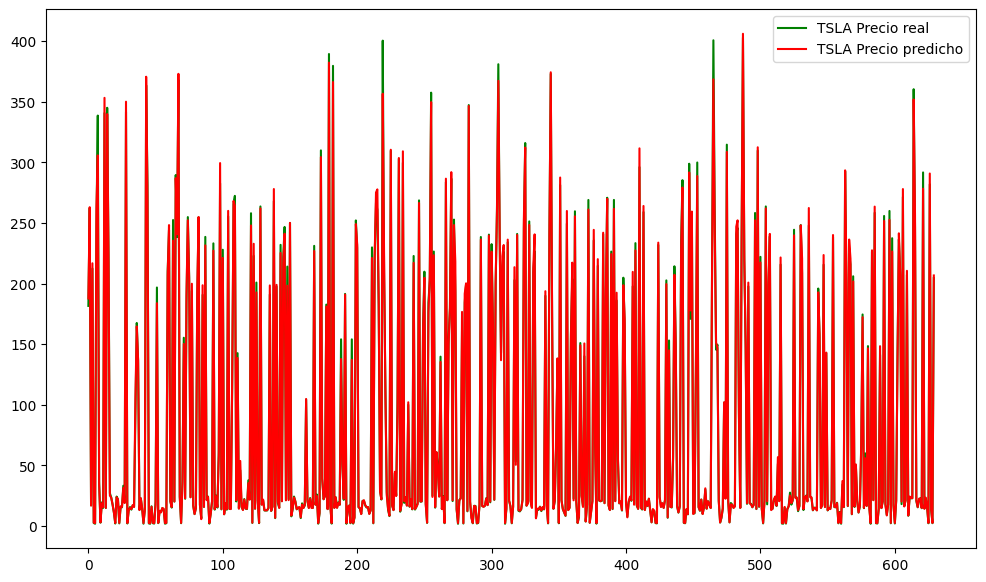

In [15]:
plt.figure(figsize=(12, 7))
plt.plot(y_test,color="green",label=f"{company} Precio real")
plt.plot(y_pred_gb,color="red",label=f"{company} Precio predicho")
plt.legend()
plt.show()

In [16]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Aplicando modelo XGBoost de regresión
xgb_regressor = xgb.XGBRegressor()

# Definir los parámetros a buscar
parameters = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2]
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(xgb_regressor, parameters, cv=5, n_jobs=-1)

# Realizar la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor estimador
#best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [17]:
# Realizar predicciones
y_pred_xg = best_estimator.predict(X_test)

# Calcular MSE
mse_xg = mean_squared_error(y_test, y_pred_xg)

print("Error cuadrático medio: ", mse_xg)

Error cuadrático medio:  24.470250274104956


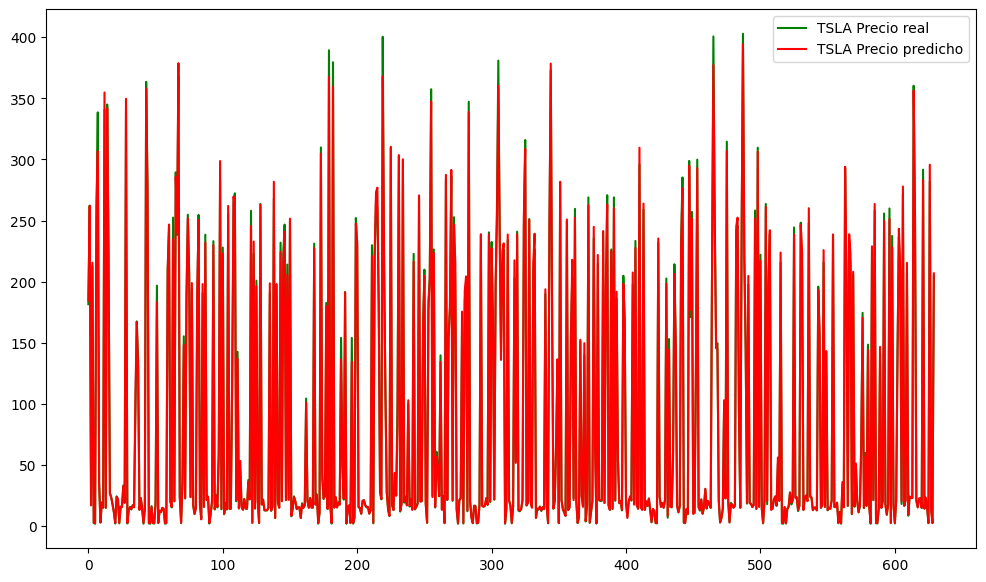

In [18]:
plt.figure(figsize=(12, 7))
plt.plot(y_test,color="green",label=f"{company} Precio real")
plt.plot(y_pred_xg,color="red",label=f"{company} Precio predicho")
plt.legend()
plt.show()

In [19]:
df_mse = pd.DataFrame([['Regresión Lineal', mse_lr],
                       ['Randon Forest', mse_rf],
                       ['Gradiente Regressor', mse_gb],
                       ['XGBooster', mse_xg]], columns=['Modelo', 'mse'])

df_mse

,Modelo,mse
0,Regresión Lineal,18.430955
1,Randon Forest,23.501201
2,Gradiente Regressor,23.769755
3,XGBooster,24.470250


In [20]:
####### CON MEDIAS MÓVILES #######################

# Obtengo el promedio de los 7, 15, 30, 50, 60, 90 y 100 días anteriores
df['SMA_7'] = df['Close'].rolling(window=7).mean()
df['SMA_15'] = df['Close'].rolling(window=15).mean()
df['SMA_30'] = df['Close'].rolling(window=30).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_60'] = df['Close'].rolling(window=60).mean()
df['SMA_90'] = df['Close'].rolling(window=90).mean()
df['SMA_100'] = df['Close'].rolling(window=100).mean()

df = df.dropna()

X = df[['Open', 'Volume', 'SMA_7', 'SMA_15', 'SMA_30', 'SMA_50', 'SMA_60', 'SMA_90', 'SMA_100']].values
y = df['Close'].values

print(X.shape)
print(y.shape)

(3107, 9)
(3107,)


In [21]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [22]:
model_lr = LinearRegression()

model_lr.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred_lr = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)

print("Error cuadrático medio: ", mse_lr)

Error cuadrático medio:  16.273596999602656


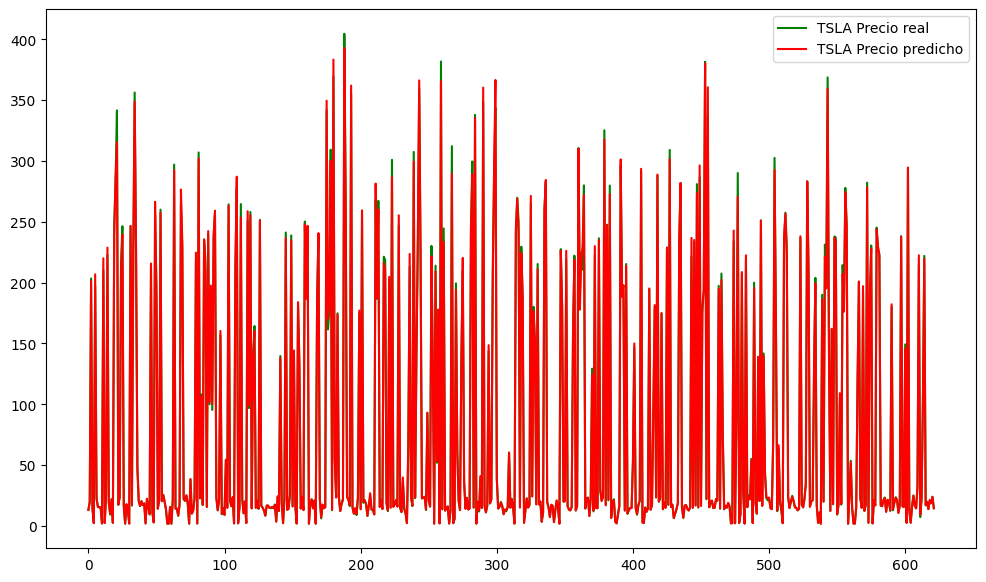

In [24]:
plt.figure(figsize=(12, 7))
plt.plot(y_test,color="green",label=f"{company} Precio real")
plt.plot(y_pred_lr,color="red",label=f"{company} Precio predicho")
plt.legend()
plt.show()

In [25]:
model_rf = RandomForestRegressor()

model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [26]:
y_pred_rf = model_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)

print("Error cuadrático medio: ", mse_rf)

Error cuadrático medio:  21.21226364094887


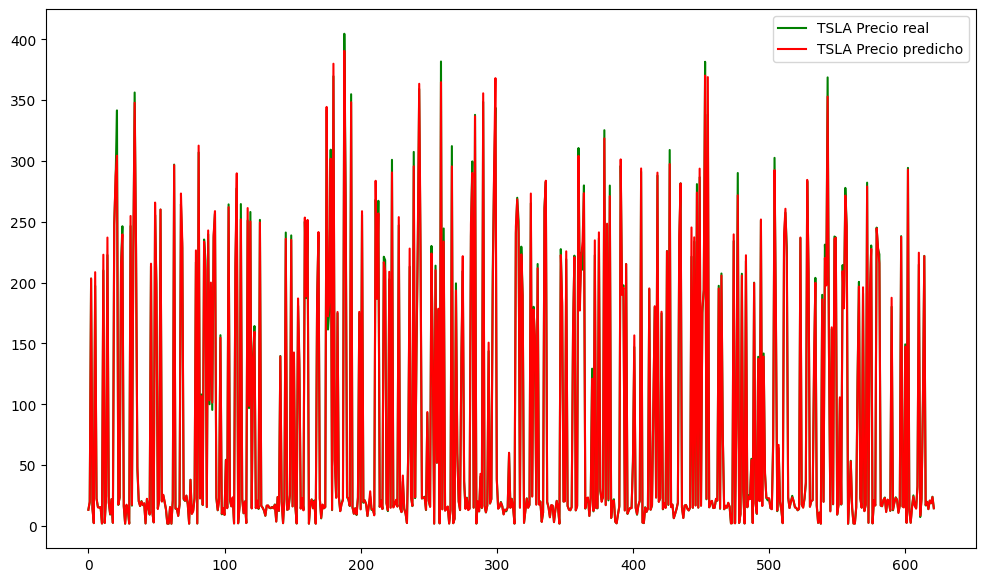

In [27]:
plt.figure(figsize=(12, 7))
plt.plot(y_test,color="green",label=f"{company} Precio real")
plt.plot(y_pred_rf,color="red",label=f"{company} Precio predicho")
plt.legend()
plt.show()

In [28]:
# Crear y entrenar el modelo de Gradient Boosting
modelo_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

modelo_gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [29]:
# Realizar predicciones
y_pred_gb = modelo_gb.predict(X_test)

# Calcular MSE y MAE
mse_gb = mean_squared_error(y_test, y_pred_gb)

print("Error cuadrático medio: ", mse_gb)

Error cuadrático medio:  18.72323776631712


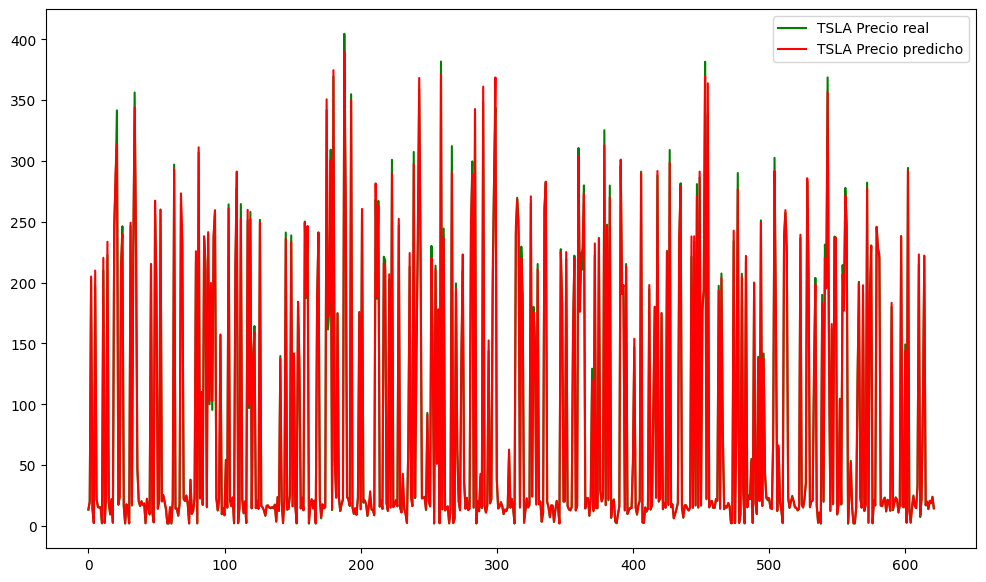

In [30]:
plt.figure(figsize=(12, 7))
plt.plot(y_test,color="green",label=f"{company} Precio real")
plt.plot(y_pred_gb,color="red",label=f"{company} Precio predicho")
plt.legend()
plt.show()

In [31]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Aplicando modelo XGBoost de regresión
xgb_regressor = xgb.XGBRegressor()

# Definir los parámetros a buscar
parameters = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2]
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(xgb_regressor, parameters, cv=5, n_jobs=-1)

# Realizar la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor estimador
#best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

In [32]:
# Realizar predicciones
y_pred_xg = best_estimator.predict(X_test)

# Calcular MSE
mse_xg = mean_squared_error(y_test, y_pred_xg)

print("Error cuadrático medio: ", mse_xg)

Error cuadrático medio:  18.11836593071706


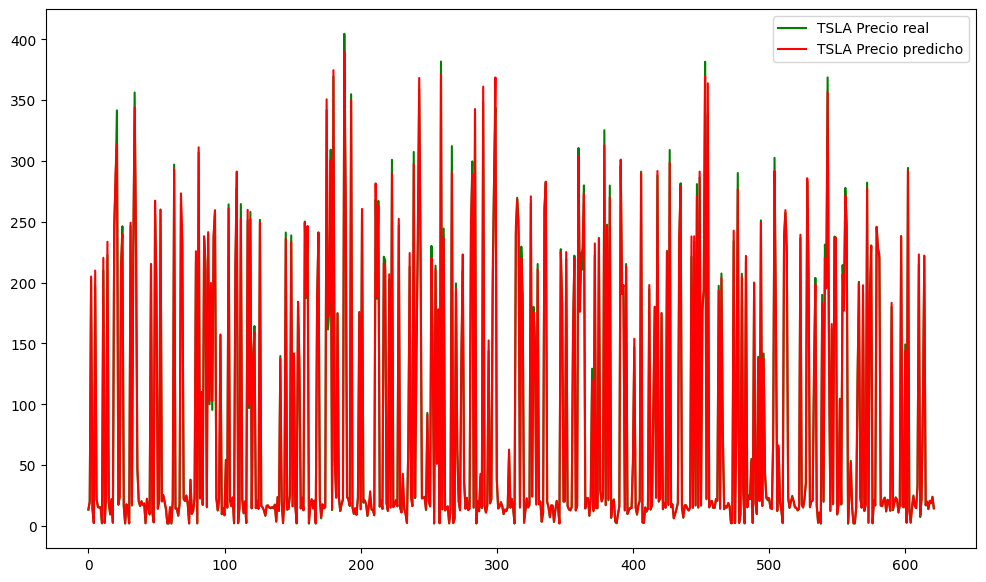

In [33]:
plt.figure(figsize=(12, 7))
plt.plot(y_test,color="green",label=f"{company} Precio real")
plt.plot(y_pred_gb,color="red",label=f"{company} Precio predicho")
plt.legend()
plt.show()

In [34]:
df_mse = pd.DataFrame([['Regresión Lineal', mse_lr],
                       ['Randon Forest', mse_rf],
                       ['Gradiente Regressor', mse_gb],
                       ['XGBooster', mse_xg]], columns=['Modelo', 'mse'])

df_mse

,Modelo,mse
0,Regresión Lineal,16.273597
1,Randon Forest,21.212264
2,Gradiente Regressor,18.723238
3,XGBooster,18.118366


In [35]:
from sklearn.preprocessing import MinMaxScaler

# Minmaxscaler
x_scaler = MinMaxScaler()

# fit_transform: Cálcular máximos/mínimos y escalar el set de entrenamiento
x_tr_s = x_scaler.fit_transform(X_train)

# Algunas características del escalador
print('Características del escalador ajustado:')
print(x_scaler.data_min_, x_scaler.data_max_)

# Resultado
print('Resultado del escalamiento sobre "x_tr":')
print(f'  Mínimos: {x_tr_s.min(axis=0)}')
print(f'  Máximos: {x_tr_s.max(axis=0)}')

Características del escalador ajustado:
[1.78933299e+00 5.63700000e+06 1.82885698e+00 1.86404440e+00
 1.90784440e+00 1.92418664e+00 1.92883332e+00 1.96414071e+00
 1.97925330e+00] [4.11470001e+02 9.14082000e+08 3.96351907e+02 3.73074219e+02
 3.67256000e+02 3.57797866e+02 3.56038332e+02 3.36829480e+02
 3.30935132e+02]
Resultado del escalamiento sobre "x_tr":
  Mínimos: [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  Máximos: [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [36]:
y_tr = y_train.reshape(-1,1)

y_scaler = MinMaxScaler()
y_tr_s = y_scaler.fit_transform(y_tr)

print('Características del escalador ajustado:')
print(y_scaler.data_min_, y_scaler.data_max_)

print('Resultado del escalamiento sobre "y_tr":')
print(f'  Mínimos: {y_tr_s.min()}')
print(f'  Máximos: {y_tr_s.max()}')

Características del escalador ajustado:
[1.74000001] [409.97000122]
Resultado del escalamiento sobre "y_tr":
  Mínimos: 0.0
  Máximos: 1.0


In [37]:
y_ts = y_test.reshape(-1,1)

y_scaler_ts = MinMaxScaler()
y_ts_s = y_scaler_ts.fit_transform(y_ts)

In [38]:
model_lr = LinearRegression()

model_lr.fit(x_tr_s, y_tr_s)

LinearRegression()

In [39]:
x_ts_s = x_scaler.transform(X_test)

In [40]:
# Realizar predicciones
y_pred_lr = model_lr.predict(x_ts_s)

# Calcular MSE
mse_lr = mean_squared_error(y_ts_s, y_pred_lr)

print("Error cuadrático medio: ", mse_lr)

Error cuadrático medio:  0.00012113249584129477


In [41]:
y_ts_pred = y_scaler_ts.inverse_transform(y_pred_lr)

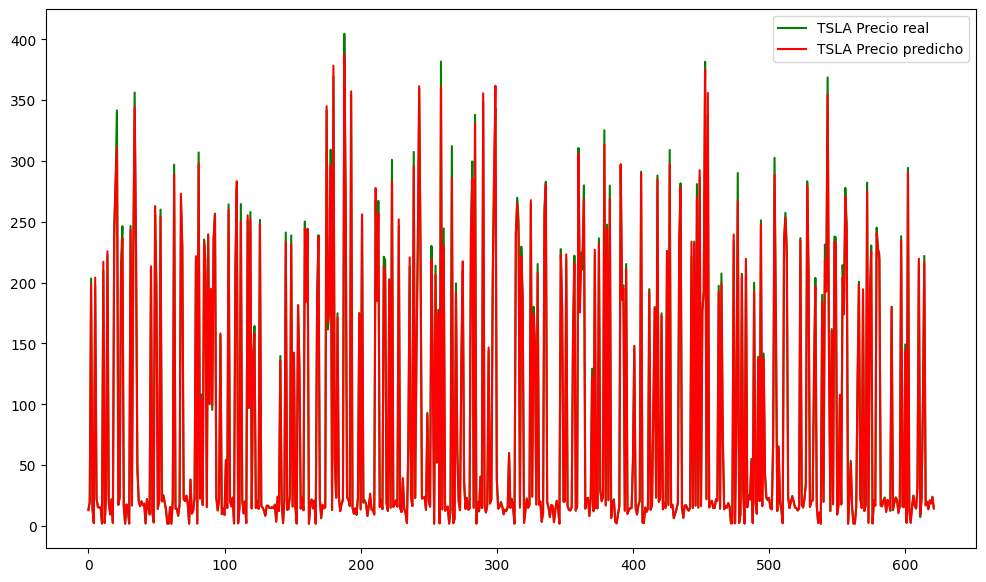

In [42]:
plt.figure(figsize=(12, 7))
plt.plot(y_test,color="green",label=f"{company} Precio real")
plt.plot(y_ts_pred,color="red",label=f"{company} Precio predicho")
plt.legend()
plt.show()

In [48]:
model_rf = RandomForestRegressor()

model_rf.fit(x_tr_s, y_tr_s)

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [49]:
# Realizar predicciones
y_pred_rf = model_rf.predict(x_ts_s)

# Calcular MSE
mse_rf = mean_squared_error(y_ts_s, y_pred_rf)

print("Error cuadrático medio: ", mse_rf)

Error cuadrático medio:  0.00014715000400558932


In [43]:
x_train2 = np.reshape(x_tr_s,(x_tr_s.shape[0],x_tr_s.shape[1],1))

In [44]:
# Red LSTM

dim_entrada = (x_train2.shape[1],1)
dim_salida = 1
na = 50

modelo_lst = Sequential()
modelo_lst.add(LSTM(units=na, input_shape=dim_entrada))
modelo_lst.add(Dense(units=dim_salida))
modelo_lst.compile(optimizer='rmsprop', loss='mse')

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
modelo_lst.fit(x_train2,y_tr_s,epochs=50,batch_size=32)

Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.0436e-04
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.3552e-04
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.8188e-04
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.9295e-04
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.8165e-04
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.9264e-04
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.0546e-04
Epoch 8/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.9201e-04
Epoch 9/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.4485e-04
Epoch 10/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.8227e-04
Epoch 11/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.7429e-04
Epoch 12/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.3211e-04
Epoch 13/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.3022e-04
Epoch 14/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.2232e-04
Epoch 15/50
78/78 ━━━━━━━━━━━

In [59]:
x_test2 = np.reshape(x_ts_s,(x_ts_s.shape[0],x_ts_s.shape[1],1))

In [60]:
# Realizar predicciones
y_pred_lst = modelo_lst.predict(x_test2)

# Calcular MSE
mse_lst = mean_squared_error(y_ts_s, y_pred_lst)

print("Error cuadrático medio: ", mse_lst)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Error cuadrático medio:  0.0006108978268639976


In [61]:
predicted_prices = y_scaler_ts.inverse_transform(y_pred_lst.reshape(-1,1))

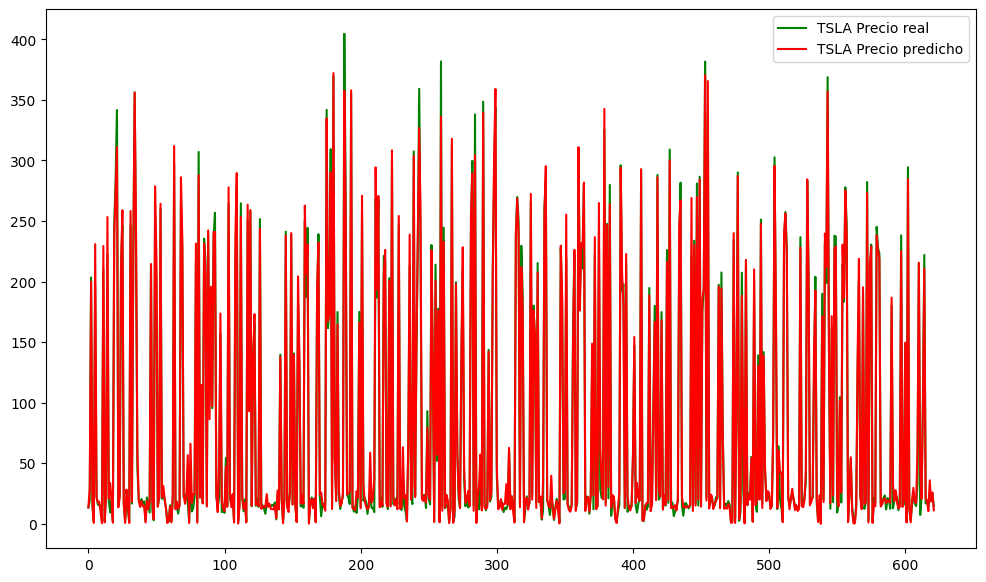

In [62]:
plt.figure(figsize=(12, 7))
plt.plot(y_test,color="green",label=f"{company} Precio real")
plt.plot(predicted_prices,color="red",label=f"{company} Precio predicho")
plt.legend()
plt.show()

In [63]:
rentability = 1
for i in range(1,len(y_test)):
  if predicted_prices[i] > y_test[i-1]:
    rentability*= y_test[i]/y_test[i-1]

print((rentability-1)*100,"%")

9.033941152953504e+203 %
